In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *

In [2]:
tau1 = 6e-9
tau2 = 20e-9

In [3]:
# freq vs voltage
def T(v):
  return 1.88e-9 * v +  9.302e-9

def nth_edge_time(t,y,n):
  counter = -1
  last_state = 0
  for i in range(0,len(t)):
    state = y[i]
    if ((last_state <= 0.5) and (state > 0.5)):
      counter += 1
    last_state = state
    if (counter >= n):
      return t[i]
  
    

def QFM(t,bias,modulation,**kwargs):
  R = 1e3
  C = 100e-12

  n_pulses = kwargs.get("n_pulses",1)
  
  ir = 1/(R*C)*np.exp(-t/(R*C))
  
  yrc = fft_convolve(t,[modulation,ir])
  T_density = T(yrc + bias)
  
  F_density = 1/T_density
  osc_out = ((integrate_dt(t,F_density))%n_pulses - 0.5)<0
  return osc_out

In [4]:
t = np.arange(0,1.5e-6,10e-12) # be sure to make not to few steps, if you have a sharp IR
modulation = detector_signal_function(t, -150e-12, tau1, tau2, 10e-9)
bias = 0.4

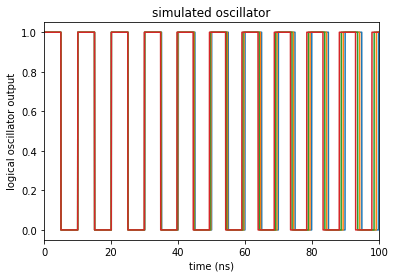

In [5]:

plt.plot(t*1e9, QFM(t,bias,modulation) )
plt.plot(t*1e9, QFM(t,bias,2*modulation) )
plt.plot(t*1e9, QFM(t,bias,3*modulation) )
plt.plot(t*1e9, QFM(t,bias,4*modulation) )
plt.xlabel("time (ns)")
plt.ylabel("logical oscillator output")
plt.title("simulated oscillator")
plt.xlim(0,100)
plt.show()

In [6]:
T100 = nth_edge_time(t,QFM(t,bias,modulation),100)
print("100 cycles = {:3.3f}ns".format(T100*1e9))

100 cycles = 1003.980ns


In [7]:
def delta_t(Q):
  modulation  = detector_signal_function(t, Q, tau1, tau2, 10e-9)
  T100_idle   = nth_edge_time(t,QFM(t,bias,modulation*0),100)
  T100_signal = nth_edge_time(t,QFM(t,bias,modulation),100)
  return T100_signal - T100_idle

In [8]:
Q_list = []
delta_t_list = []

for Q in np.linspace(0,-1e-9,10):
  Q_list       += [Q]
  delta_t_list += [delta_t(Q)]

Q_list = np.array(Q_list)
delta_t_list = np.array(delta_t_list)

Text(0,0.5,'phase difference (ns)')

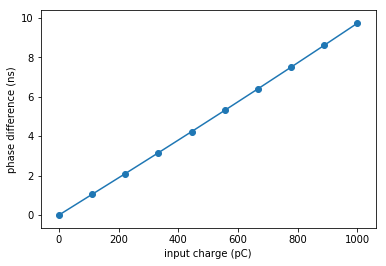

In [9]:
plt.plot(-Q_list*1e12,-delta_t_list*1e9)
plt.scatter(-Q_list*1e12,-delta_t_list*1e9)
plt.xlabel("input charge (pC)")
plt.ylabel("phase difference (ns)")

# note

assuming 35 ps jitter in the measurement,
this translates to a charge measurement error of about 3.5 pC


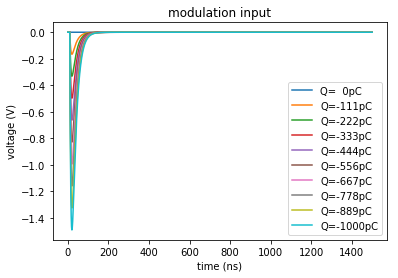

In [10]:

for Q in np.linspace(0,-1e-9,10):
  modulation  = detector_signal_function(t, Q, tau1, tau2, 10e-9)
  plt.plot(t*1e9,modulation,label="Q={:3.0f}pC".format(Q*1e12))
    
plt.legend()
plt.ylabel("voltage (V)")
plt.xlabel("time (ns)")
plt.title("modulation input")
plt.show()


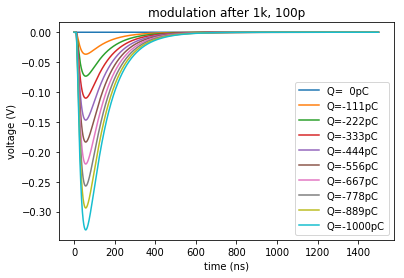

In [11]:

for Q in np.linspace(0,-1e-9,10):
  modulation  = detector_signal_function(t, Q, tau1, tau2, 10e-9)
  plt.plot(t*1e9,RC_filter(t,modulation,1e3,100e-12),label="Q={:3.0f}pC".format(Q*1e12))
    
plt.legend()
plt.ylabel("voltage (V)")
plt.xlabel("time (ns)")
plt.title("modulation after 1k, 100p")
plt.show()
